<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_Example_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.1 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Closed loop TF =  
                  10
---------------------------------------
s^5 + 7 s^4 + 6 s^3 + 42 s^2 + 8 s + 56

Poles =  [-7.00000000e+00+0.j          3.46944695e-16+2.j
  3.46944695e-16-2.j          5.55111512e-17+1.41421356j
  5.55111512e-17-1.41421356j]
Zeros =  []


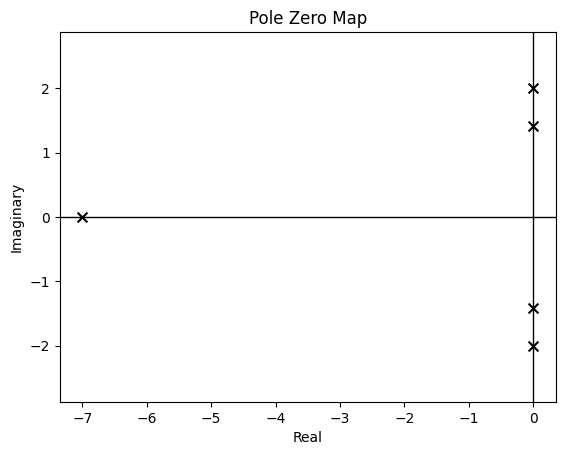

In [6]:
# Define your transfer function:
#TF(s) = 10 / (s^5+7s^4+6s^3+42s^2+8s+56)

# Coefficients of the numerator
num = [10]
# Coefficients of the denominator
den = [1, 7, 6, 42, 8, 56]

# close loop transfer function
TF = tf(num,den)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

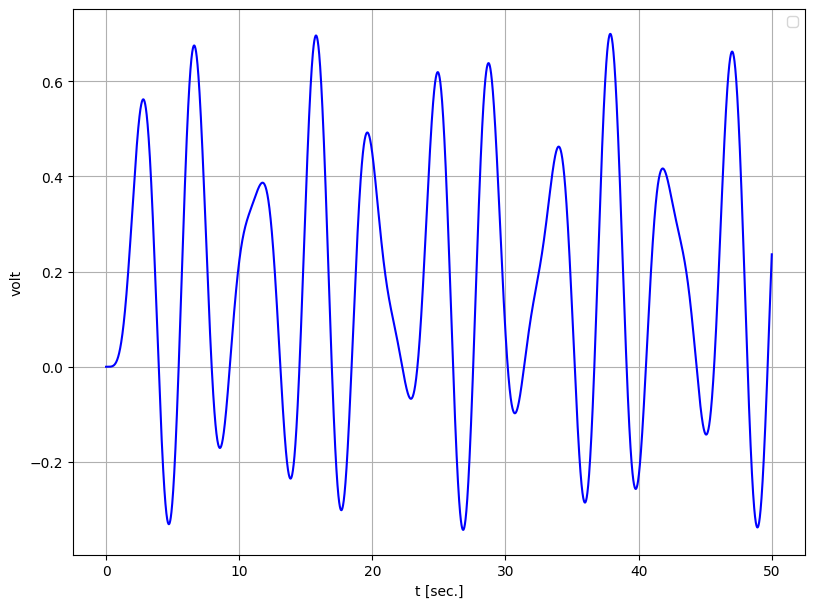

In [9]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 50
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
#plt.subplot(2,1,1)
#plt.plot(t, u, "green")

#plt.grid()
#plt.legend(labels =("u"))
#plt.ylabel("volt")

#plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")